<a href="https://colab.research.google.com/github/CristianEyebrow/CSCI_167/blob/main/gym_doms_diss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

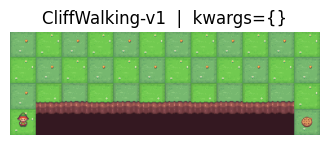

In [3]:
# Install (Colab)
!pip install gymnasium matplotlib numpy --quiet

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def show_env_image(env_id="FrozenLake-v1", **make_kwargs):
    """
    Render an RGB image of a Gymnasium env if supported; otherwise
    synthesize a grid image for Toy Text maps that expose `desc`.
    """
    # Try native RGB render
    try:
        env = gym.make(env_id, render_mode="rgb_array", **make_kwargs)
        env.reset(seed=42)
        frame = env.render()
        env.close()
        img = frame
    except Exception:
        # Fallback: draw from ASCII desc (works for many toy_text envs)
        env = gym.make(env_id, **make_kwargs)
        env.reset(seed=42)
        desc = getattr(getattr(env, "unwrapped", env), "desc", None)
        if desc is None:
            raise RuntimeError("This env does not support rgb_array or ASCII desc fallback.")
        desc = np.asarray(desc, dtype="U1")
        env.close()
        color_map = {'S':[144,238,144], 'F':[173,216,230], 'H':[0,0,0], 'G':[255,215,0],
                     'R':[255,0,0], 'Y':[255,255,0], 'B':[0,0,255], 'G2':[0,128,0]}
        h, w = desc.shape
        img = np.zeros((h, w, 3), dtype=np.uint8)
        for i in range(h):
            for j in range(w):
                img[i, j] = color_map.get(desc[i, j], [200,200,200])
        img = np.kron(img, np.ones((64, 64, 1), dtype=np.uint8))

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{env_id}  |  kwargs={make_kwargs}")
    plt.show()

show_env_image("CliffWalking-v1")